# Notebook #1: Exploring 2017 
This markdown will go through the 2017 dataframe to get a better understanding of the data that I will be working with to answer my research question: Have Philadelphia's efficiency iniatives made any substantial impact over the past 5 years of energy benchmarking?

The first thing I am going to do is upload the five years worth of energy data that I have and import the necessary functions that I need to conduct my analysis.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import math
import os
import glob

#import energy usage data of Philadelphia's buildings from 2013-2017
yr2013_df = pd.read_csv('../data/energy_usage_large_commercial_buildings_reported_2013.csv')
yr2014_df = pd.read_csv('../data/energy_usage_large_commercial_buildings_reported_2014.csv')
yr2015_df = pd.read_csv('../data/properties_reported_2015.csv')
yr2016_df = pd.read_csv('../data/properties_reported_2016.csv')
yr2017_df = pd.read_csv('../data/properties_reported_2017.csv')


## Part 1: Primary Inspection

### Overall Dataframe Exploration
Now, I am going to inspect the 2017 data frame to get a feel for what type of data I have amongst the five years 

Now I am going to first inspect the shape. How much data do I have in 2017?

In [2]:
yr2017_df.shape

(1530, 20)

In [3]:
# How many buildngs do I have in 2017?

nrows = yr2017_df.shape[0]
nrows


1530

In [4]:
# how many data points do I have per row?
ncols = yr2017_df.shape[1]
ncols

20

#### Random sample 
Now I am going to investigate my data to get a feel for it by looking at a random sample from the 2017 data frame

In [5]:
# define a random sample from 2017 and call it sample2017
yr2017_df.sample(10)

,electricity_use_kbtu,objectid,street_address,property_name,opa_account_num,postal_code,num_of_buildings,year_built,primary_prop_type_epa_calc,total_floor_area_bld_pk_ft2,portfolio_manager_id,natural_gas_use_kbtu,fuel_oil_o2_use_kbtu,steam_use_kbtu,energy_star_score,site_eui_kbtuft2,source_eui_kbtuft2,water_use_all_kgal,total_ghg_emissions_mtco2e,notes
1213,1212424.2,3460,1216-18 WALNUT ST,Midtown Associates LP,881011100,19107,1,1922,Multifamily Housing,66377.0,5010884,2994927.2,NaN,NaN,NaN,63.4,104.7,2747.1,293.6,NaN
1154,2003478.6,3341,3501-17 N BROAD ST,BOYER PKG GAR on Tioga Street,777532901,19140,1,2000,Parking,188099.0,5036972,NaN,1717037.1,NaN,NaN,19.8,42.7,11.3,349.7,NaN
276,630380.6,3260,1801-59 N AMERICAN ST,1801 N American,884080300,19122,1,1986,Non-Refrigerated Warehouse,87500.0,5056684,892866.4,NaN,NaN,91.0,17.4,33.3,61.9,117.4,NaN
1341,1054316.5,4205,5691 RISING SUN AVE,jerusalem,882021110,19120,1,1950,Retail Store,90000.0,6423243,985533.1,NaN,NaN,NaN,22.7,48.3,4919.7,169.3,NaN
1528,NaN,4600,726-28 MARKET ST,Market Street Apatment Associates LLC,881012035,19106,1,1900,Multifamily Housing,70000.0,4998553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1413,488310.1,3175,2000-04 WALNUT ST,Rittenhouse Parking Garage,883427700,19103,1,1989,Parking,80105.0,3959060,NaN,NaN,NaN,NaN,6.1,19.1,679.6,54.2,NaN
587,3614669.4,3856,1929 SANSOM ST,Kate's Place,886617500,19103,1,1900,Residence Hall/Dormitory,60000.0,3155346,6378631.6,NaN,NaN,13.0,166.6,300.8,3477.0,739.8,NaN
1034,216445781.6,4517,8200 ENTERPRISE AVE,Southwest WPCP,783131000,19153,12,1975,Wastewater Treatment Plant,220000.0,4964605,NaN,NaN,NaN,90.0,983.8,3089.3,5802.5,24010.5,NaN
359,1572618.1,3467,6302 OLD YORK RD,Philip Murray House II,881451120,19141,1,2005,Multifamily Housing,49928.0,5050012,3318728.9,NaN,NaN,8.0,98.0,168.7,2176.8,350.7,NaN
434,1661094.7,3561,4301 RIDGE AVE,Falls Ridge,886761710,19129,1,2004,Multifamily Housing,66123.0,5913368,1283936.4,NaN,NaN,83.0,44.5,99.3,1459.4,252.5,NaN


In [6]:
yr2017_df.count()

electricity_use_kbtu           1502
objectid                       1530
street_address                 1530
property_name                  1530
opa_account_num                1520
postal_code                    1530
num_of_buildings               1530
year_built                     1530
primary_prop_type_epa_calc     1530
total_floor_area_bld_pk_ft2    1528
portfolio_manager_id           1530
natural_gas_use_kbtu           1187
fuel_oil_o2_use_kbtu            126
steam_use_kbtu                  192
energy_star_score              1056
site_eui_kbtuft2               1493
source_eui_kbtuft2             1493
water_use_all_kgal             1476
total_ghg_emissions_mtco2e     1497
notes                             0
dtype: int64

Inspecting Sample2017 Observations
- The kinds of data recorded: properties in Philadelphia, their names, their addresses, their postcodes, square footage, property manager ID's, longitude, latitudes, energy emissions, natural gas usage, water usage,Property type, year built, and Energy Star Score
- the units: gallons for water, ghg for carbon emissions, kbt for steam and eui
- Missing data: in the Notes column, int he steam usage, some energy starscores, soem fuel oil usage, and some natural gas usage 
- Discrepancies in the postal codes -- some give just the 5 digit numbers while others have the more specific  5 digit-4 digit 

## Part 2: Exploring different columns

### 1. Exploration of Property Types

I want to first look at property types - how many of each property type are there? 

In [7]:
yr2017_df['primary_prop_type_epa_calc'].value_counts()

Multifamily Housing                                 387
K-12 School                                         250
Office                                              200
College/University                                   90
Non-Refrigerated Warehouse                           78
Hotel                                                45
Other                                                37
Distribution Center                                  37
Parking                                              35
Mixed Use Property                                   34
Retail Store                                         32
Self-Storage Facility                                30
Manufacturing/Industrial Plant                       30
Residence Hall/Dormitory                             24
Hospital (General Medical & Surgical)                23
Senior Care Community                                20
Supermarket/Grocery Store                            20
Medical Office                                  

Seeing how many groups there are, I realize these can be grouped into larger categories that will be more helpful for my analysis. 

In [8]:
#create dictionary for the property types
categories = {
    'Housing' : ['Multifamily Housing', 'Residential Care Facility', 'Other - Lodging/Residential', 'Residence Hall/Dormitory', 'Senior Care Community'],
    'Office' : ['Office', 'Financial Office'],
    'Science' : ['Other - Technology/Science', 'Data Center', 'Laboratory'],
    'Education' : ['K-12 School', 'College/University', 'Other - Education', 'Adult Education'],
    'Industrial' : ['Wastewater Treatment Plant', 'Other - Utility', 'Drinking Water Treatment & Distribution', 'Non-Refridgerated Warehouse', 'Distribution Center', 'Manufacturing/Industrial Plant', 'Self-Storage Facility', 'Refrigerated Warehouse'],
    'Hospitality' : ['Hotel'],
    'Retail' : ['Enclosed Mall', 'Wholesale Club/Supercenter', 'Food Sales', 'Bar/Nightclub', 'Automobile Dealership', 'Mailing Center/Post Office', 'Restaurant', 'Food Service', 'Retail Store','Supermarket/Grocery Store', 'Other - Mall','Strip Mall', 'Repair Services (Vehicle, Shoe, Locksmith, etc.)'],
    'Medical' : ['Other - Specialty Hospital', 'Hospital (General Medical & Surgical)', 'Outpatient Rehabilitation/Physical Therapy', 'Ambulatory Surgical Center', 'Medical Office'],
    'Religious' : ['Worship Facility'],
    'Sports/Entertainment' : ['Stadium (Open)', 'Other - Recreation', 'Ice/Curling Rink', 'Movie Theater', 'Fitness Center/Health Club/Gym', 'Stadium (Closed)', 'Performing Arts'],
    'Convention Center' : ['Convention Center'],
    'Public Services/Gov' : ['Other - Public Services', 'Social/Meeting Hall', 'Museum', 'Library', 'Courthouse'],
    'Prison' : ['Prison/Incarceration'],
    'Parking' : ['Parking'],
    'Mixed Use' : ['Mixed Use Property'],
    'Other': ['Other']
}


Because I coded the dictionary backwards, the following code was used to revert it without retyping the entire thing. 

In [9]:
categories2={}
for k, vlist in categories.items():
    for v in vlist:
        categories2[v]=k

Now I want to apply these categories to the 2017 dataframe so that I can then see how many buildings are in each property type. This will prove useful later in my analysis when I explore the differences of efficiencies amongst different type of buildings. 

In [10]:
yr2017_df['prop_type_cond'] = yr2017_df['primary_prop_type_epa_calc'].map(categories2)

In [11]:
yr2017_df['prop_type_cond'].value_counts()

Housing                 437
Education               348
Office                  201
Industrial              116
Retail                   84
Medical                  47
Hospitality              45
Other                    37
Parking                  35
Mixed Use                34
Public Services/Gov      30
Religious                13
Sports/Entertainment      9
Science                   8
Prison                    6
Convention Center         2
Name: prop_type_cond, dtype: int64

This distribution was interesting because it shows me that majority of buildings reported are housing, education-related, office, industrial, and retail -- reflecting the 5 main asset classes of real estate. I anticipate focusing in on those categories when I explore energy efficiency over time and per asset class. What I think is even more interesting here is the large number of education based buildings. This is uncharacteristic for a number of cities but very indicative of Philadelphia's place as a university-heavy city. What is cool about this is that students are among the leaders of energy efficiency and cutting back on fossil fuels -- something we see often at Penn. Thus, if I can show how much energy Philadelphia schools are wasting then maybe this can give students even more incentive and quantitative evidence to incite change from within. 

### 2. Exploration of Greenhouse Gas Emission Ranges

Now I want to explore the energy emission ranges of the buildings in Philadelphia

In [12]:
yr2017_df['total_ghg_emissions_mtco2e'].value_counts()

0.0        4
283.2      3
407.9      2
213.0      2
359.4      2
62.3       2
715.2      2
354.4      2
608.6      2
214.3      2
314.7      2
483.3      2
273.6      2
270.0      2
847.7      2
1696.2     2
426.6      2
425.8      2
136.8      2
249.2      2
604.4      2
113.1      2
356.6      2
257.6      2
265.6      2
586.5      2
824.3      2
270.3      2
3316.7     2
1123.8     2
          ..
656.8      1
324.4      1
294.1      1
116.1      1
1416.7     1
256.4      1
3639.5     1
1776.5     1
6768.5     1
3383.6     1
2043.0     1
664.1      1
3773.3     1
462.7      1
676.7      1
1259.7     1
988.9      1
782.2      1
73877.6    1
319.3      1
2014.8     1
735.6      1
316.6      1
4380.4     1
814.4      1
710.5      1
1208.5     1
340.7      1
1070.2     1
299.0      1
Name: total_ghg_emissions_mtco2e, Length: 1431, dtype: int64

That did not tell me much so what I want to do is investigate the mean, max, and min to get a better feel for what the range of energy emissions are in these buildings. 

In [13]:
#to get the max
yr2017_df['total_ghg_emissions_mtco2e'].max()

536400.1

In [14]:
#to get the min
yr2017_df['total_ghg_emissions_mtco2e'].min()

0.0

In [15]:
#to get the average
yr2017_df['total_ghg_emissions_mtco2e'].mean()

2280.1054108216426

### 3. Exploration of Energy STAR Scores

From this analysis, I know that certain buildings can get as high as 536,400 metric tons of co2 ghg emission. However, the median of this data set is much lower at 2,280 showing that far less buildings use that much energy. Thus this show that there is an intersting story here of what types of buildings and which buildings use the most energy. This makes me question whether this building usees that much energy because of just its square footage size, or if there are other factors like property type or age of the building

Now I want to explore the Energy Star Scores. ENERGY STAR is a score assessing how a property is performing compared to similar buildings nationwide. It is on a 1-100 scale. The more stars on the Energy Rating Label, the more energy efficient the property is. A score of 50 is the median. So if the building scores below 50, it means that it is performing worse than 50% of the buildings nationwide. A score of 75 of higher means that the building is a top performer and may be eligible for ENERGY STAR certification. This score does evaluate actual billed energy data, normalize for business activity (hours, workers, climate), compare to buildings to the national population, and indicate the level of energy performance. The score does not sum the energy use of each piece of equipment, credit specific technologies, compare buildings with others in Portfolio Manager, explain why a building performs well or poorly. Source: https://www.energystar.gov/buildings/facility-owners-and-managers/existing-buildings/use-portfolio-manager/interpret-your-results/what . 

This thus shows the need for my story to add information behind the ENERGY STAR scores. Why are certain buildings rated higher than others -- is it because of their age, their use, their location, etc? 

In [16]:
yr2017_df['energy_star_score'].mean()

58.959280303030305

Further, this shows that Philadelphia's buildings on average are just above the national average. This means that Philadelphia is not necessarily a leading city in terms of energy efficiency. What this does though leave us to wonder is if the average is brought down by a bunch of energy inefficient buildings and there are a substantial about of buildings who are more efficient. This was semi-useful but now I want to investigate further. I want to first explore the max, min, and mean.

In [17]:
yr2017_df['energy_star_score'].max()

100.0

I want to know what building has this score so let's explore the row of buildings whose energy star score = 100

In [18]:
yr2017_df[(yr2017_df['energy_star_score'] == 100)]

,electricity_use_kbtu,objectid,street_address,property_name,opa_account_num,postal_code,num_of_buildings,year_built,primary_prop_type_epa_calc,total_floor_area_bld_pk_ft2,...,natural_gas_use_kbtu,fuel_oil_o2_use_kbtu,steam_use_kbtu,energy_star_score,site_eui_kbtuft2,source_eui_kbtuft2,water_use_all_kgal,total_ghg_emissions_mtco2e,notes,prop_type_cond
2,NaN,4573,4343 WHITAKER AVE,ECI Building,884184500,19124,1,1950,Distribution Center,93000.0,...,663312.3,NaN,NaN,100.0,7.1,7.5,68.1,35.2,NaN,Industrial
12,407853.4,3192,1330 VERNON RD,St. Raymond of Penafort,775329000,19150,2,1950,K-12 School,61900.0,...,NaN,NaN,NaN,100.0,6.6,20.7,953.6,45.2,NaN,Education
132,68185.4,3153,403 W SPRINGFIELD AVE,Chestnut Hill,775535510,19118,1,1900,K-12 School,220000.0,...,9026747.9,536902.8,NaN,100.0,43.8,46.5,5.4,526.9,NaN,Education
184,1646611.4,3559,1001 W LUZERNE ST,Little Flower Catholic High School,777247000,19140,2,1939,K-12 School,184000.0,...,880446.2,0.0,NaN,100.0,13.7,33.1,2085.7,229.4,NaN,Education
210,31767644.4,4224,5301 CEDAR AVE,Mercy Philadelphia Hospital,774005000,19143,1,1918,Hospital (General Medical & Surgical),613550.0,...,40080199.6,0.0,NaN,100.0,117.1,231.2,16094.3,5652.9,NaN,Medical
215,51155979.5,4372,3899 RICHMOND ST,Northeast WPCP,786456805,19137,20,1944,Wastewater Treatment Plant,240000.0,...,94654049.6,124324.2,NaN,100.0,608.1,1083.9,60159.6,10711.5,NaN,Industrial
234,4142.2,3064,1330 RHAWN ST,Tacony Academy Charter School,778506501,19111,1,1978,K-12 School,52500.0,...,3033428.8,NaN,NaN,100.0,57.9,60.9,2669.7,161.6,NaN,Education
235,128247.2,3133,2825-45 SOUTHAMPTON RD,2825-2845 Southampton Rd,884291510,19154,1,1984,Office,66000.0,...,96242.1,NaN,NaN,100.0,3.4,7.6,325.2,19.3,NaN,Office
238,25539.7,3144,3000 MEETINGHOUSE RD,Origlio Property Holding,884292800,19154,1,2001,Non-Refrigerated Warehouse,268000.0,...,3447869.5,NaN,NaN,100.0,13.0,13.8,971.2,186.0,NaN,NaN
243,525807.3,3183,1730 N 5TH ST,Sewing Factory,881066605,19122,1,1931,Multifamily Housing,118946.0,...,13645.8,NaN,NaN,100.0,4.5,14.0,424.9,59.1,NaN,Housing


Wow! 58 buildings have an Energy Star Score of 100. One that suprised me is Hamilton Court -- a building that many of my friends live in.
Other observations:
- These buildings all had relatively small energy per sf ratios
- Big property type mix -- education, medical, industrial, office, religious and a lot of housing 
- All these buildings are relatively new -- built within the past 5 years

In [19]:
yr2017_df['energy_star_score'].min()

1.0

This analysis proved to be pretty unuseful because it shows that Philadelphia has a building that is completely inefficient and a building that is 100% efficient. This tells me that it would be better to investigate the ENERGY STAR scores in terms of distributions of ranges of 10. 

In [20]:
# insert distribution code 
# pd.cut ---> new column 
# labels = ['0-10', '11-20', '21-30']

yr2017_df['energy_star_group'] = pd.cut(yr2017_df['energy_star_score'], bins=10, labels = ['0-10','11-20', '21-30', '31-40','41-50','51-60','61-70','71-80','81-90','91-100'])

In [21]:
yr2017_df['energy_star_group']

0       91-100
1         0-10
2       91-100
3          NaN
4        31-40
5        71-80
6        51-60
7          NaN
8          NaN
9        31-40
10       21-30
11       51-60
12      91-100
13         NaN
14       51-60
15       31-40
16       71-80
17       81-90
18       61-70
19       51-60
20       71-80
21        0-10
22       21-30
23       81-90
24       51-60
25       51-60
26       51-60
27       31-40
28       21-30
29       51-60
         ...  
1500       NaN
1501       NaN
1502       NaN
1503       NaN
1504       NaN
1505       NaN
1506       NaN
1507       NaN
1508       NaN
1509       NaN
1510       NaN
1511       NaN
1512       NaN
1513       NaN
1514       NaN
1515       NaN
1516       NaN
1517       NaN
1518       NaN
1519       NaN
1520       NaN
1521       NaN
1522       NaN
1523       NaN
1524       NaN
1525       NaN
1526       NaN
1527       NaN
1528       NaN
1529       NaN
Name: energy_star_group, Length: 1530, dtype: category
Categories (10, object): [0-10

Now that I grouped these into Enery Star Score distributions now I want to see how many buildings are in each distribution

In [22]:
#count how many buildings are in each distribution 
yr2017_df['energy_star_group'].value_counts()

91-100    177
81-90     155
71-80     137
61-70     105
0-10      104
41-50      85
51-60      84
31-40      84
21-30      77
11-20      48
Name: energy_star_group, dtype: int64

This gives an awesome understanding of the efficiencies of buildings in Philadelphia. For one, there are a lot of buildings that are over the 75 mark for Energy Star Status. I want to now visualize this distribution.


Text(0, 0.5, 'Number of Buildings')

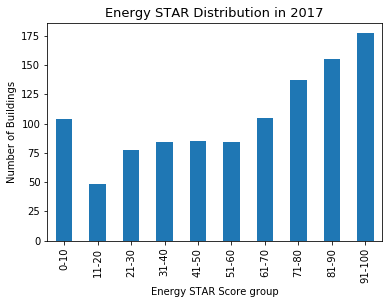

In [23]:
#visualize the distribution of energy star scores
energy_star_dist =  yr2017_df.groupby('energy_star_group').size()
energy_star_dist.plot(kind='bar')

plt.title('Energy STAR Distribution in 2017', size=13)
plt.xlabel('Energy STAR Score group')
plt.ylabel('Number of Buildings')

In [24]:
 yr2017_df.groupby('energy_star_group').size()

energy_star_group
0-10      104
11-20      48
21-30      77
31-40      84
41-50      85
51-60      84
61-70     105
71-80     137
81-90     155
91-100    177
dtype: int64

This shows me a very good visualization of the distribution of energy scores in this year's report. It shows that Philadelphia's has a pretty disparate distribution of buildings that fall across the entire Energy Star Score spectrum. It is assuring that the largest group of buildings are in the most efficient 91-100 column. 

### 4. Exploration of Building Ages
Now I want to further explore the age ranges of the buildings 

In [25]:
#age range of buildings 
yr2017_df['year_built'].value_counts()

2000    69
1950    43
1930    37
1970    36
1980    31
1929    29
1925    26
1965    26
1920    25
1905    25
1960    24
1940    24
2009    24
1963    23
2007    23
2005    22
2004    22
1964    22
1900    22
1990    21
1910    20
1972    19
1973    19
1968    19
2013    18
1923    17
1926    17
2006    16
1981    16
1924    15
        ..
1941     2
1885     2
1857     1
1860     1
1858     1
1840     1
1854     1
1851     1
1848     1
1845     1
1843     1
1818     1
1815     1
1868     1
1888     1
1873     1
1874     1
1881     1
1884     1
1886     1
1887     1
1889     1
1993     1
1892     1
1894     1
1896     1
1946     1
1944     1
1934     1
1756     1
Name: year_built, Length: 152, dtype: int64

Now I want to explore this data further by looking at how old vs. young the buildings and what is the mean age. This will give me an idea about how I should group them

In [26]:
yr2017_df['year_built'].max()

2017

In [27]:
yr2017_df['year_built'].min()

1756

In [28]:
yr2017_df['year_built'].mean()

1960.5790849673203

This shows that now I have very old buildings and very new. Now I want to group these into decades

In [29]:
# insert code to group into year ranges
yr2017_df['year_built_group'] = pd.cut(yr2017_df['year_built'], bins=8, labels = ['1700-1800','1801-1850', '1851-1900', '1901-1925','1926-1950','1951-1975','1976-2000','2001-2025'])

Now I want to visualize the year built distribution. I first just tried plotting the distribution

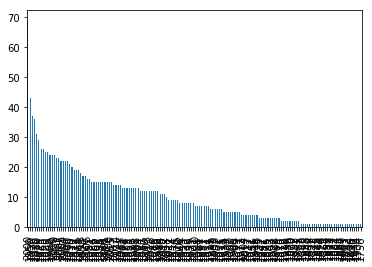

In [30]:
year_built_dist = yr2017_df['year_built'].value_counts()
year_built_dist.plot(kind='bar')

But then i realized that graph is far too confusing and way too much going on so then I decided it would be better to graph the range distributions I created previously by decade

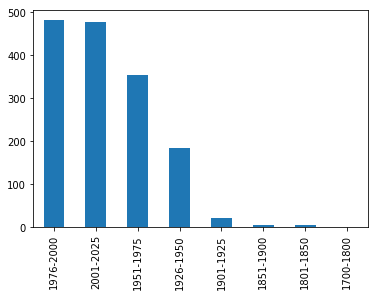

In [31]:
year_built_dist = yr2017_df['year_built_group'].value_counts()
year_built_dist.plot(kind='bar')

This is more helpful, but I still think I can do better. This shows me that I want to want to group all the buildings from 1700-1900, and then group the 1900 buildings by deccade, then group the 2000's by 5 year intervals.

In [32]:
yr2017_df['year_built_group'] = pd.cut(yr2017_df['year_built'], bins=11, labels = ['1700-1800','1801-1850', '1851-1900', '1901-1925','1926-1950','1951-1975','1976-2000', '2001-2005', '2006-2010','2011-2015', '2016-2020'])

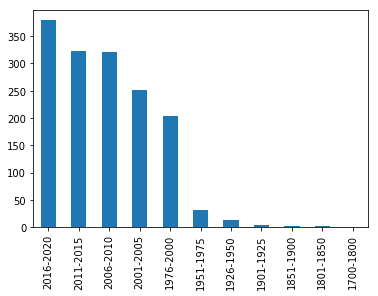

In [33]:
year_built_dist = yr2017_df['year_built_group'].value_counts()
year_built_dist.plot(kind='bar')

This is better but I still want to know more. Let's explore the 2000's more. 

In [34]:
yr2017_df['year_built_group'] = pd.cut(yr2017_df['year_built'], bins=18, labels = ['2000','2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'])

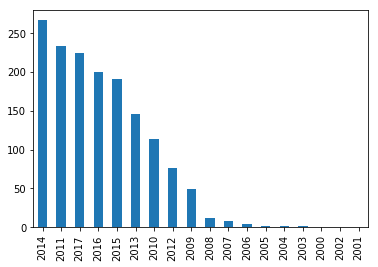

In [35]:
year_built_dist = yr2017_df['year_built_group'].value_counts()
year_built_dist.plot(kind='bar')


This is very useful but I need to make the years go in order of time instead of descending quantity 

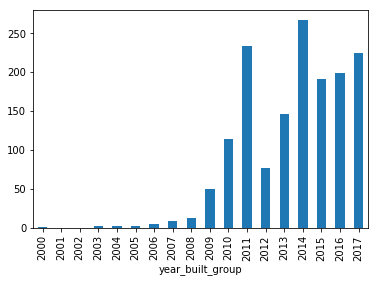

In [36]:
year_built_dist = yr2017_df.groupby('year_built_group').size()
year_built_dist.plot(kind='bar')

I noticed here that the majority of the buildings were not built before 2008 in this decade so I want to further zoom in on the 2008-2017 time frame 

In [37]:
yr2017_df['year_built_group'] = pd.cut(yr2017_df['year_built'], bins=10, labels = ['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'])

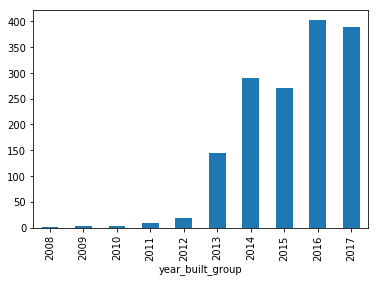

In [38]:
year_built_dist = yr2017_df.groupby('year_built_group').size()
year_built_dist.plot(kind='bar')


This shows that many buildings were built starting in 2013, peaking at 2016. This makes sense thinking about the real estate market and its cycle. After the recession of 2008, there was a major slow down in building due to the losses people took. 2016 marked the height of the real estate cycle and now we are getting concerned that another downturn is going to come. This is confirmed by the slight dip in 2017. It would be interesting to see how many buildings were built in 2018. 

### 5. Exploring Energy efficiency per square foot 

I am now interested in exploring the ratio of energy emitted per square foot. Does this measure correlate to Energy Star Scores? Will this show that certain buildings are more efficient asset class wise/ age wise? 

In [39]:
yr2017_df['energy_per_sf']= (yr2017_df['total_ghg_emissions_mtco2e'] / yr2017_df['total_floor_area_bld_pk_ft2'])
         

In [40]:
print(yr2017_df['energy_per_sf'])

0       0.003492
1       0.038027
2       0.000378
3       0.006260
4       0.004867
5       0.005066
6       0.005984
7       0.004600
8       0.000303
9       0.004459
10      0.009117
11      0.005076
12      0.000730
13      0.002271
14      0.008424
15      0.009485
16      0.006957
17      0.005705
18      0.005397
19      0.005849
20      0.003898
21      0.020803
22      0.006044
23      0.006342
24      0.006932
25      0.008977
26      0.007555
27      0.008947
28      0.013245
29      0.007441
          ...   
1500         NaN
1501         NaN
1502         NaN
1503         NaN
1504         NaN
1505         NaN
1506         NaN
1507         NaN
1508         NaN
1509         NaN
1510         NaN
1511         NaN
1512         NaN
1513         NaN
1514         NaN
1515         NaN
1516         NaN
1517         NaN
1518         NaN
1519         NaN
1520         NaN
1521         NaN
1522         NaN
1523         NaN
1524         NaN
1525         NaN
1526         NaN
1527         N

This was useful but for my own analysis later I think it would be bettter to put these ratios into percentage form

In [41]:
yr2017_df['energy_per_sf_percent']= yr2017_df['energy_per_sf']*100
         

In [42]:
print(yr2017_df['energy_per_sf_percent'])

0       0.349233
1       3.802692
2       0.037849
3       0.625982
4       0.486699
5       0.506565
6       0.598378
7       0.459953
8       0.030289
9       0.445861
10      0.911732
11      0.507576
12      0.073021
13      0.227111
14      0.842433
15      0.948549
16      0.695655
17      0.570501
18      0.539714
19      0.584867
20      0.389792
21      2.080337
22      0.604388
23      0.634222
24      0.693165
25      0.897718
26      0.755499
27      0.894686
28      1.324488
29      0.744064
          ...   
1500         NaN
1501         NaN
1502         NaN
1503         NaN
1504         NaN
1505         NaN
1506         NaN
1507         NaN
1508         NaN
1509         NaN
1510         NaN
1511         NaN
1512         NaN
1513         NaN
1514         NaN
1515         NaN
1516         NaN
1517         NaN
1518         NaN
1519         NaN
1520         NaN
1521         NaN
1522         NaN
1523         NaN
1524         NaN
1525         NaN
1526         NaN
1527         N

I am much happier with these numbers in percentage form. Now, I want to further explore these values. First I will do so by looking at a sample.


In [43]:
yr2017_df['energy_per_sf_percent'].sample(30)

14      0.842433
1030    0.996073
553     0.476692
403     0.332174
1459    1.041580
386     0.479443
79      0.454405
421     0.408872
1000    0.254054
1176    0.840189
1305    1.555326
1440    0.530715
1094    0.855625
1329    0.068519
390     0.473212
515     0.651933
63      1.285132
848     1.213080
899     0.225064
606     0.661421
715     0.478307
918     0.027579
546     0.425068
616     0.427559
645     0.614709
524     0.612219
382     0.394794
270     0.112280
438     0.184748
1005    1.200513
Name: energy_per_sf_percent, dtype: float64

Now that I see it like this, I am not fully sure a percent makes sense. It is not that the energy of a building is used by 40% of the building (e.g.). What I really want to see is per square foot, how much energy is being emitted. So I am going to delete the column I just made from my data frame since I already have so many columns, I dont need one that doesnt tell me anything significant.

In [44]:
yr2017_df = yr2017_df.drop('energy_per_sf_percent', axis =1)

I want to check that worked so I am going to relook at the heads of the dataframe to confirm.

In [45]:
yr2017_df.head()

,electricity_use_kbtu,objectid,street_address,property_name,opa_account_num,postal_code,num_of_buildings,year_built,primary_prop_type_epa_calc,total_floor_area_bld_pk_ft2,...,energy_star_score,site_eui_kbtuft2,source_eui_kbtuft2,water_use_all_kgal,total_ghg_emissions_mtco2e,notes,prop_type_cond,energy_star_group,year_built_group,energy_per_sf
0,2310408.2,3589,1100 CATHARINE ST,Palumbo,781043800,19147,1,1980,K-12 School,185206.0,...,97.0,41.5,68.6,672.8,646.8,NaN,Education,91-100,2016,0.003492
1,23297409.0,4560,4100 CITY AVE,WPVI-TV,883080200,19131,1,2009,Office,69698.0,...,1.0,352.1,1068.3,2322.0,2650.4,NaN,Office,0-10,2017,0.038027
2,NaN,4573,4343 WHITAKER AVE,ECI Building,884184500,19124,1,1950,Distribution Center,93000.0,...,100.0,7.1,7.5,68.1,35.2,NaN,Industrial,91-100,2015,0.000378
3,4749439.2,4153,3801 MARKET ST,First District Plaza,883805600,19104,1,1986,Other,87830.0,...,NaN,59.3,175.9,1838.1,549.8,NaN,Other,NaN,2016,0.006260
4,1168752.3,3450,1100 TYSON AVE,Moore,786543400,19111,1,1980,K-12 School,67701.0,...,32.0,72.8,112.6,1456.4,329.5,NaN,Education,31-40,2016,0.004867


Now that I got over that confusion lets investigate these ratios.

In [46]:
yr2017_df['energy_per_sf'].mean()

0.00843141554252394

The average building emits .84 metric tons of carbon green house gas per square foot in Philly.

In [47]:
yr2017_df['energy_per_sf'].max()

0.8792507355773564

The least efficient building emits 87.92 metric tons of carbon green house gas per square foot.

In [48]:
yr2017_df['energy_per_sf'].min()

0.0

The most efficient building doesn't emit any green house gases. I either this is a reporting building or the building has instituted very ecologically sustainable practices -- however, I suspect, the latter unlikely.
I now want to investigate more of the least efficient building by looking at its entire row -- what type of building is it, how old is it? 

In [49]:
yr2017_df[(yr2017_df['energy_per_sf'] == 87.92507355773564)]

,electricity_use_kbtu,objectid,street_address,property_name,opa_account_num,postal_code,num_of_buildings,year_built,primary_prop_type_epa_calc,total_floor_area_bld_pk_ft2,...,energy_star_score,site_eui_kbtuft2,source_eui_kbtuft2,water_use_all_kgal,total_ghg_emissions_mtco2e,notes,prop_type_cond,energy_star_group,year_built_group,energy_per_sf


Here we see that this building was built in 1970 so it is relatively old but definitely not the oldest based on some of the exploration of year built. It is an office building. A very large one in fact of ~610,000 SF. It's energy star score is a 1 which makes sense because of how inefficient it is. Because it emits that much carbon per square foot and the building is already that large this really tells us how inefficient the building is and really shows us the titanic amount of carbon it is emitting. 

#### Is there a correlation between energy star score and GHG emission per SF?

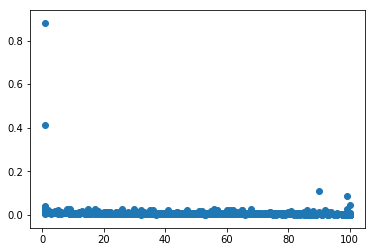

In [50]:
plt.scatter(yr2017_df['energy_star_score'],yr2017_df['energy_per_sf'])
plt.show()


No correlation between energy star score and GHG emitted per SF. Some argue that energy STAR scores are not indicative of real efficiency or strong enough measures for sustainaibility. THis shows that one can still have a high energy STAR score but emit a lot of Greenhouse gas per SF. Should the city make a better measure? 

## Part 3. Creating the 2017 Building Searcher Tool

The last thing I want to do with this data is create a table with key energy metrics that I can export as a CSV to turn into a wix widget that my readers can search. If people can find their buildings through my searcher -- they can figure out how their own building is doing. Maybe this will make them conscience about their own energy use and/or lead them to motivate their landlords to increase efficiency. Even more, people can use this when moving to new buildings if they are energy consicnece and want to be in a building that helps the environment.

In [51]:
#create export list for article
export_2017 = pd.concat([yr2017_df['property_name'], yr2017_df['street_address'], yr2017_df['energy_star_score'], yr2017_df['total_ghg_emissions_mtco2e']], axis=1)

In [52]:
export_2017.sample(10)

,property_name,street_address,energy_star_score,total_ghg_emissions_mtco2e
22,The Rittenhouse Plaza,1901-05 WALNUT ST,26.0,1686.9
821,4700 Wissahickon Ave.,4422-88 WISSAHICKON AVE,62.0,3246.6
409,Oakland Terrace 2012 LP,6025 E ROOSEVELT BLVD,75.0,304.0
1237,Burlington Coat Factory,330 OREGON AVE,NaN,308.9
1483,618 Market Street,618-34 MARKET ST,NaN,177.7
26,1429 Walnut,1429-33 WALNUT ST,59.0,585.3
732,3701 Market St.,3701 MARKET ST,1.0,3611.7
680,The Latham,135 S 17TH ST,19.0,520.1
292,Police Gun Permit Facility,660-70 E ERIE AVE,29.0,206.7
839,Rush,11081 KNIGHTS RD,14.0,1163.3


In [53]:
#rename columns for better export
export_2017.columns=['Property Name', 'Address', 'Energy STAR Score', 'Greenhouse Gas Emission (mtco2e)']

In [54]:
export_2017.sample(10)

,Property Name,Address,Energy STAR Score,Greenhouse Gas Emission (mtco2e)
861,Hilton Philadelphia-Homewood Suites,4200 CITY AVE,55.0,1935.6
883,One Franklin Town,1 FRANKLIN TOWN BLVD,84.0,1639.4
8,Kawin LLC,3501 CEDAR ST,NaN,15.9
1082,Jefferson Alumni Hall,1008-34 LOCUST ST,NaN,9225.1
947,Crafts House Apartments,51-55 N 3RD ST,48.0,235.2
707,Croydon Hall Apartments,241 S 49TH ST,29.0,586.5
612,21-Myers Hall,202-14 N 33RD ST,42.0,628.3
245,"Brenntag Specialties, Inc.",5700 TACONY ST,86.0,113.4
1340,Globe Development group,4520-40 WORTH ST,NaN,275.7
1326,Ottens Flavors,7800 HOLSTEIN AVE,NaN,977.4


In [55]:
#Create CSV
export_2017.to_csv('../data/2017export.csv')

## Part 4: Exploration of which zipcode is most and least efficient for a possible article? 

In [107]:
#how many zipcodes are there?
yr2017_df['postal_code'].unique()

array(['19147', '19131', '19124', '19104', '19111', '19149', '19139',
       '19132', '19134', '19116', '19114', '19145', '19150', '19107',
       '19103', '19130', '19102', '19106', '19107-5099', '19107-4205',
       '19107-5244', '19146', '19107-4083', '19107-4998', '19107-5098',
       '19140', '19107-5233', '19107-5563', '19122', '19125', '19144',
       '19128', '19148', '19118', '19151', '19126', '19136', '19142',
       '19135', '19129', '19120', '19141', '19143', '19121', '19123',
       '19115', '19152', '19154', '19137', '19138', '19133', '19119',
       '19112', '19153', '19135-3701', '19128-3232', '19126-2233',
       '19113', '19127', '19034', '19046', '19119-2345', '19101', '19110',
       '191533111', '19107-5541', '19107-6799', '19006', '19107-5587',
       '19108', '19103-1115', '191371303', '19114-2009', '19146-2703',
       '19153-3877', '19109', '19096', '19107-5004'], dtype=object)

In [108]:
yr2017_df['postal_code'].value_counts()

19103         123
19104          96
19107          90
19106          64
19102          61
19122          58
19131          54
19144          53
19124          46
19154          43
19123          43
19148          41
19134          40
19140          39
19114          36
19116          33
19153          32
19130          30
19121          30
19152          26
19128          26
19146          26
19111          25
19141          25
19145          24
19136          23
19139          23
19143          22
19147          22
19120          21
             ... 
19107-5098      1
19135-3701      1
19146-2703      1
19103-1115      1
19107-4205      1
19107-4998      1
19107-5244      1
19113           1
19107-5233      1
19110           1
19108           1
19107-6799      1
191533111       1
19006           1
19107-4083      1
19034           1
19107-5563      1
19096           1
19128-3232      1
19109           1
19119-2345      1
19153-3877      1
19107-5587      1
19046           1
19107-5541

In [109]:
INSERT MEAN CODE!

SyntaxError: invalid syntax (<ipython-input-109-d552663a1c25>, line 1)

## Part 4: Exploring the University City Buildings Subset
For my article about University City and its efficiency, I will need to make a subsetted dataframe with just buildings in the 19104 zipcode to analyze. 
Although, I wanted to be able to analyze the building reported in University City across time period -- I know that exploring the buildings in the 2017 dataframe would be my next best option since merging data frames based on building IDs on a multilevel basis has proved to be very complex.

In [56]:
#to figure out what zipcode column name is
yr2017_df.head()
#column head is postal_code

,electricity_use_kbtu,objectid,street_address,property_name,opa_account_num,postal_code,num_of_buildings,year_built,primary_prop_type_epa_calc,total_floor_area_bld_pk_ft2,...,energy_star_score,site_eui_kbtuft2,source_eui_kbtuft2,water_use_all_kgal,total_ghg_emissions_mtco2e,notes,prop_type_cond,energy_star_group,year_built_group,energy_per_sf
0,2310408.2,3589,1100 CATHARINE ST,Palumbo,781043800,19147,1,1980,K-12 School,185206.0,...,97.0,41.5,68.6,672.8,646.8,NaN,Education,91-100,2016,0.003492
1,23297409.0,4560,4100 CITY AVE,WPVI-TV,883080200,19131,1,2009,Office,69698.0,...,1.0,352.1,1068.3,2322.0,2650.4,NaN,Office,0-10,2017,0.038027
2,NaN,4573,4343 WHITAKER AVE,ECI Building,884184500,19124,1,1950,Distribution Center,93000.0,...,100.0,7.1,7.5,68.1,35.2,NaN,Industrial,91-100,2015,0.000378
3,4749439.2,4153,3801 MARKET ST,First District Plaza,883805600,19104,1,1986,Other,87830.0,...,NaN,59.3,175.9,1838.1,549.8,NaN,Other,NaN,2016,0.006260
4,1168752.3,3450,1100 TYSON AVE,Moore,786543400,19111,1,1980,K-12 School,67701.0,...,32.0,72.8,112.6,1456.4,329.5,NaN,Education,31-40,2016,0.004867


I will filter out the buildings in U-city through the column postal_code by filtering out only '19104'

In [57]:
university_city_df = yr2017_df[yr2017_df['postal_code'].isin(['19104'])]

In [58]:
print(len(university_city_df))

96


There are 96 buildings reported from University City

In [59]:
#look at a sample of them
university_city_df.sample(30)

,electricity_use_kbtu,objectid,street_address,property_name,opa_account_num,postal_code,num_of_buildings,year_built,primary_prop_type_epa_calc,total_floor_area_bld_pk_ft2,...,energy_star_score,site_eui_kbtuft2,source_eui_kbtuft2,water_use_all_kgal,total_ghg_emissions_mtco2e,notes,prop_type_cond,energy_star_group,year_built_group,energy_per_sf
676,4879528.5,4077,219-25 N 34TH ST,31-Millenium Hall,881822910,19104,1,2009,Residence Hall/Dormitory,102680.0,...,43.0,76.7,179.9,3683.6,700.6,NaN,Housing,41-50,2017,0.006823
499,2057446.2,3599,3817-39 MARKET ST,Ralston Mercy Douglass,881822820,19104,1,2000,Multifamily Housing,56784.0,...,36.0,49.2,127.4,1729462.5,267.5,NaN,Housing,31-40,2017,0.004711
977,2781035.9,3727,3514-30 LANCASTER AVE,Old Quaker Building,881111127,19104,2,1870,Multifamily Housing,71993.0,...,27.0,38.6,121.3,2725.0,308.5,NaN,Housing,21-30,2012,0.004285
418,1308511.9,3441,728-62 N 44TH ST,Washington Martha,783691500,19104,1,1930,K-12 School,71300.0,...,67.0,90.0,132.8,2857.5,416.4,NaN,Education,61-70,2014,0.005840
93,19776248.8,4152,3600-90 WALNUT ST,Sansom Common,773566000,19104,1,1997,Hotel,259330.0,...,5.0,274.4,455.8,13999.3,5219.7,NaN,Hospitality,0-10,2017,0.020128
1234,1870345.8,3556,760 S 42ND ST,Goodman Hall,881822480,19104,1,1986,College/University,65820.0,...,NaN,38.6,99.9,1874.8,243.0,NaN,Education,NaN,2016,0.003692
251,155812.4,3203,55 N 40TH ST,Center Post Apartments,881822830,19104,1,1940,Multifamily Housing,67473.0,...,99.0,69.0,77.3,4979.8,256.4,NaN,Housing,91-100,2015,0.003800
180,1240104.0,3406,700 N 35TH ST,McMichael,783631400,19104,1,1916,K-12 School,100000.0,...,26.0,68.6,95.8,1697.1,551.1,NaN,Education,21-30,2014,0.005511
1070,5277613.4,4032,101 N 33RD ST,"55,55A,55B,55C-Academic/DesignAnnex/MathForum/...",774551000,19104,4,1926,College/University,117168.0,...,NaN,102.1,209.0,1111.6,1018.6,NaN,Education,NaN,2014,0.008693
1063,4841177.6,3966,3508-18 MARKET ST,Monell Center,774688100,19104,1,1970,Office,61589.0,...,NaN,150.2,332.9,801.3,829.8,NaN,Office,NaN,2016,0.013473


#### How old are the buildings in U-city?

In [60]:
#What is the avg. age of these buildings? 
university_city_df['year_built'].mean()

1962.5520833333333

In [61]:
university_city_df['year_built_group'] = pd.cut(university_city_df['year_built'], bins=11, labels = ['1700-1800','1801-1850', '1851-1900', '1901-1925','1926-1950','1951-1975','1976-2000', '2001-2005', '2006-2010','2011-2015', '2016-2020'])



/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### Exploring  property type of university city 
I would expect there to be a lot of education and residential buildings in this area 

In [62]:
#using prop type cond column 
university_city_df['prop_type_cond'].value_counts()

Housing                 27
Education               24
Office                  19
Medical                  9
Mixed Use                5
Hospitality              4
Science                  3
Industrial               1
Other                    1
Parking                  1
Sports/Entertainment     1
Name: prop_type_cond, dtype: int64

As expected, most of these buildings are housing and education.

In [63]:
#How many SF reported in U City
university_city_df['total_floor_area_bld_pk_ft2'].astype('int').sum()

43245932

42,779,137 SF reported in University City

Text(0, 0.5, 'Number of Buildings')

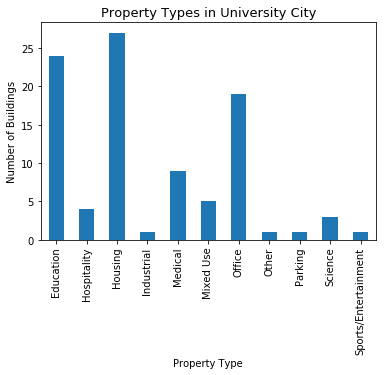

In [64]:
#visualize the distribution of energy star scores
ucity_prop_dist =  university_city_df.groupby('prop_type_cond').size()
ucity_prop_dist.plot(kind='bar')

plt.title('Property Types in University City', size=13)
plt.xlabel('Property Type')
plt.ylabel('Number of Buildings')

#### Exploring GHG Emission for U-City

In [65]:
#get rid of null values to find stats
university_city_df=university_city_df[(-university_city_df['total_ghg_emissions_mtco2e'].isnull())]

In [66]:
university_city_df['total_ghg_emissions_mtco2e'].astype('int').mean()

6458.731182795699

In [67]:
university_city_df['total_ghg_emissions_mtco2e'].astype('int').max()

217326

In [68]:
university_city_df['total_ghg_emissions_mtco2e'].astype('int').min()

17

In [69]:
#how much total GHG emitted from U-city buildings?
university_city_df['total_ghg_emissions_mtco2e'].astype('int').sum()

600662

#### Stats for GHG Emission in U-city
* avg. GHG emission in U-city: 6458.73 tons
* max GHG: 217,326 tons
* min GHG: 17 tons
* total GHG: 600,662 tons

In [70]:
#energy STAR score of U-city
university_city_df=university_city_df[(-university_city_df['energy_star_score'].isnull())]

In [71]:
university_city_df['energy_star_score'].astype('int').mean()

44.39655172413793

In [113]:
#visualize low score
star_visual_ucity = [('U-City', 44), ('Philly', 59), ('United States', 50)]

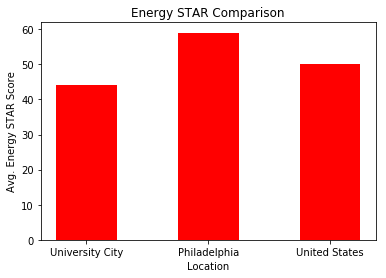

In [120]:
x= ['University City', 'Philadelphia', 'United States']
energy= [44, 59, 50]
width = [.5,.5,.5]
x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, energy, width=width, color='red')
plt.xlabel('Location')
plt.ylabel('Avg. Energy STAR Score')
plt.title('Energy STAR Comparison')
plt.xticks(x_pos, x)

plt.show()

Text(0, 0.5, 'Number of Buildings')

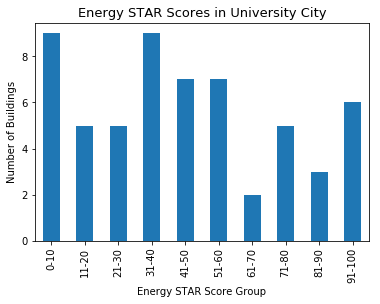

In [112]:
#visualize the distribution of energy star scores
ucity_score_dist =  university_city_df.groupby('energy_star_group').size()
ucity_score_dist.plot(kind='bar')

plt.title('Energy STAR Scores in University City', size=13)
plt.xlabel('Energy STAR Score Group')
plt.ylabel('Number of Buildings')

#### Exploring the most and least efficient buildings in U-city

Which buildings are most efficient? What do we learn from this? 

In [76]:
#which are the most efficient
ucity_best = university_city_df[university_city_df['energy_star_group'].isin(['91-100'])]

In [77]:
ucity_best

,electricity_use_kbtu,objectid,street_address,property_name,opa_account_num,postal_code,num_of_buildings,year_built,primary_prop_type_epa_calc,total_floor_area_bld_pk_ft2,...,energy_star_score,site_eui_kbtuft2,source_eui_kbtuft2,water_use_all_kgal,total_ghg_emissions_mtco2e,notes,prop_type_cond,energy_star_group,year_built_group,energy_per_sf
103,17300969.1,4389,3521-35 MARKET ST,3535 Market,883073000,19104,1,1973,Medical Office,494608.0,...,93.0,42.6,119.0,4037.9,2169.6,NaN,Medical,91-100,2011-2015,0.004387
251,155812.4,3203,55 N 40TH ST,Center Post Apartments,881822830,19104,1,1940,Multifamily Housing,67473.0,...,99.0,69.0,77.3,4979.8,256.4,NaN,Housing,91-100,2001-2005,0.003800
425,1802065.9,3548,3921-25 CHESTNUT ST,11018 - Philadelphia Ronald McDonald House,773080515,19104,1,1885,Hotel,65186.0,...,95.0,54.9,115.4,1263.2,294.3,NaN,Hospitality,91-100,1951-1975,0.004515
471,2695972.0,3655,4231-41 LOCUST ST,Fairfax Apartments,881121500,19104,1,1928,Multifamily Housing,144000.0,...,100.0,27.0,67.5,8467.1,362.6,NaN,Housing,91-100,2001-2005,0.002518
790,50743502.8,4371,2970 MARKET ST,IRS 30th Street Campus (165),883063100,19104,1,2010,Office,932088.0,...,92.0,65.0,182.0,11788.8,6149.8,NaN,Office,91-100,2016-2020,0.006598
892,13394222.3,4645,3401L CHESTNUT ST,DOMUS,881116111,19104,1,2008,Multifamily Housing,525469.0,...,98.0,31.0,85.8,12521.9,1638.4,NaN,Housing,91-100,2016-2020,0.003118


In [78]:
print(len(ucity_best)) #6 buildings best

6


Text(0, 0.5, 'Number of Buildings')

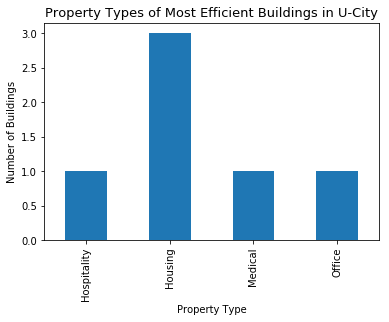

In [79]:
#visualize the distribution of energy star scores
ucity_best_dist =  ucity_best.groupby('prop_type_cond').size()
ucity_best_dist.plot(kind='bar')

plt.title('Property Types of Most Efficient Buildings in U-City', size=13)
plt.xlabel('Property Type')
plt.ylabel('Number of Buildings')

In [80]:
print(ucity_best['property_name'])

103                                   3535 Market
251                        Center Post Apartments
425    11018 - Philadelphia Ronald McDonald House
471                            Fairfax Apartments
790                  IRS 30th Street Campus (165)
892                                         DOMUS
Name: property_name, dtype: object


Here we see that private residential buildings are the most efficient -- like DOMUS. I would assume this is because the buildings are built for the top-paying students using state-of-the-art technology. 

Now, what buildings are the least efficient?

In [81]:
#which are worst 
ucity_worst = university_city_df[university_city_df['energy_star_group'].isin(['0-10'])]

In [82]:
ucity_worst

,electricity_use_kbtu,objectid,street_address,property_name,opa_account_num,postal_code,num_of_buildings,year_built,primary_prop_type_epa_calc,total_floor_area_bld_pk_ft2,...,energy_star_score,site_eui_kbtuft2,source_eui_kbtuft2,water_use_all_kgal,total_ghg_emissions_mtco2e,notes,prop_type_cond,energy_star_group,year_built_group,energy_per_sf
21,6019894.0,3761,3401-15 MARKET ST,3401 Market St.,883072000,19104,1,1930,Office,90817.0,...,1.0,269.4,452.1,1073.6,1889.3,NaN,Office,0-10,2001-2005,0.020803
56,259361166.9,4540,3400 SPRUCE ST,Hospital of the University of Pennsylvania,773009000,19104,9,1913,Hospital (General Medical & Surgical),1791804.0,...,8.0,303.3,645.1,186787.5,47604.7,NaN,Medical,0-10,1976-2000,0.026568
93,19776248.8,4152,3600-90 WALNUT ST,Sansom Common,773566000,19104,1,1997,Hotel,259330.0,...,5.0,274.4,455.8,13999.3,5219.7,NaN,Hospitality,0-10,2016-2020,0.020128
232,5245670.2,4030,4301-19 OGDEN ST,Miller,783364400,19104,1,1967,K-12 School,67200.0,...,2.0,119.0,288.1,238.6,728.2,NaN,Education,0-10,2006-2010,0.010836
732,32558075.1,4227,3701 MARKET ST,3701 Market St.,883073300,19104,1,2000,Medical Office,140913.0,...,1.0,231.1,725.5,5388.8,3611.7,NaN,Medical,0-10,2016-2020,0.025631
751,8886185.5,4166,3701-15 CHESTNUT ST,International House Philadelphia,881822460,19104,1,1970,Multifamily Housing,170000.0,...,6.0,148.6,265.3,7310.0,1855.3,NaN,Housing,0-10,2011-2015,0.010914
814,38022918.6,4284,3711 MARKET ST,3711 Market St.,Multiple,19104,1,2008,Office,155715.0,...,1.0,275.8,800.0,6918.1,4479.8,NaN,Office,0-10,2016-2020,0.028769
894,27748219.7,4649,3400L LANCASTER AVE,382-The Summit at University City,881111120,19104,1,2015,Multifamily Housing,546793.0,...,3.0,87.5,198.0,404.7,4146.3,NaN,Housing,0-10,2016-2020,0.007583
1026,9870438.3,4266,3808-14 CHESTNUT ST,CO/GLC 13090/3810 CHESTNUT ST/PHILADELPHIA/PA,773620005,19104,1,1905,Office,75176.0,...,2.0,143.2,424.3,48.0,1161.3,NaN,Office,0-10,1976-2000,0.015448


9 buildings are in the worst

Text(0, 0.5, 'Number of Buildings')

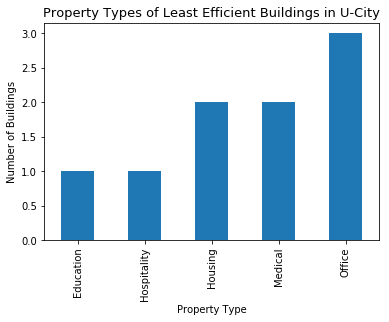

In [83]:
#visualize the distribution of property type
ucity_worst_dist =  ucity_worst.groupby('prop_type_cond').size()
ucity_worst_dist.plot(kind='bar')

plt.title('Property Types of Least Efficient Buildings in U-City', size=13)
plt.xlabel('Property Type')
plt.ylabel('Number of Buildings')

In [84]:
print(ucity_worst['property_name'])

21                                    3401 Market St.
56         Hospital of the University of Pennsylvania
93                                      Sansom Common
232                                            Miller
732                                   3701 Market St.
751                  International House Philadelphia
814                                   3711 Market St.
894                 382-The Summit at University City
1026    CO/GLC 13090/3810 CHESTNUT ST/PHILADELPHIA/PA
Name: property_name, dtype: object


#### Exploring U-city's educational buildings
Is there a story that underlies the buildings meant for education?

In [85]:
#energy star score of the education buildings
university_city_education = university_city_df[university_city_df['prop_type_cond'].isin(['Education'])]

In [86]:
print(len(university_city_education))
#7 education buildings

7


In [87]:
print(university_city_education['property_name'])

180               McMichael
195                   Locke
232                  Miller
362                 Belmont
418       Washington Martha
686          Penn Alexander
850    School of the Future
Name: property_name, dtype: object


In [88]:
#energy STAR score of education
university_city_education['energy_star_score'].mean()

27.571428571428573

In [89]:
university_city_education['energy_star_score'].max()

67.0

In [90]:
#which building has max score?
university_city_education['energy_star_score']==100.0

180    False
195    False
232    False
362    False
418    False
686    False
850    False
Name: energy_star_score, dtype: bool

In [91]:
university_city_education['energy_star_score'].min()

2.0

In [92]:
#which building has min score?
university_city_education['energy_star_score']==3.0

180    False
195    False
232    False
362    False
418    False
686    False
850    False
Name: energy_star_score, dtype: bool

I don't think there are enough buildings reported by the universities (probably due to the 50,000 SF size min.) to make a story about just the education buildings.

#### Exploring the Residential U-City Buildings
Is there any story that comes from just the residential buildings?

In [93]:
university_city_housing = university_city_df[university_city_df['prop_type_cond'].isin(['Housing'])]

In [94]:
print(len(university_city_housing))
#24 residential buildings

24


In [95]:
print(university_city_housing['property_name'])

16                              The Axis
27                         19-Kelly Hall
78                     17-Van Rensselaer
102                   Stiles Alumni Hall
251               Center Post Apartments
471                   Fairfax Apartments
499               Ralston Mercy Douglass
502       Mantua Presbyterian Apartments
612                        21-Myers Hall
676                    31-Millenium Hall
688                      26-Caneris Hall
689                        Chestnut Hall
691               CSE Centennial Village
697                         29-Race Hall
718                   3601 Market Street
719                        3737 Chestnut
751     International House Philadelphia
811                  381-Chestnut Square
834                        24-North Hall
892                                DOMUS
894    382-The Summit at University City
905             385-University Crossings
967                           The Courts
977                  Old Quaker Building
Name: property_n

In [96]:
university_city_housing['energy_star_score'].mean()

47.0

In [97]:
university_city_housing['energy_star_score'].min()

3.0

In [98]:
university_city_housing['energy_star_score'].max()

100.0

In [99]:
university_city_housing

,electricity_use_kbtu,objectid,street_address,property_name,opa_account_num,postal_code,num_of_buildings,year_built,primary_prop_type_epa_calc,total_floor_area_bld_pk_ft2,...,energy_star_score,site_eui_kbtuft2,source_eui_kbtuft2,water_use_all_kgal,total_ghg_emissions_mtco2e,notes,prop_type_cond,energy_star_group,year_built_group,energy_per_sf
16,6735.5,3066,20 S 36TH ST,The Axis,881601401,19104,1,1900,Residence Hall/Dormitory,32818.0,...,78.0,120.4,133.2,7650.9,228.3,NaN,Housing,71-80,1976-2000,0.006957
27,4560755.6,3947,201 N 34TH ST,19-Kelly Hall,881822870,19104,1,1967,Residence Hall/Dormitory,89931.0,...,37.0,101.4,219.7,3150.4,804.6,NaN,Housing,31-40,2006-2010,0.008947
78,3867727.2,3826,229 N 34TH ST,17-Van Rensselaer,881822860,19104,1,1931,Residence Hall/Dormitory,80202.0,...,31.0,98.2,211.6,3175.4,695.4,NaN,Housing,31-40,2001-2005,0.008671
102,11225295.8,4385,325 N 15TH ST,Stiles Alumni Hall,881038200,19104,1,1972,Residence Hall/Dormitory,186330.0,...,30.0,79.5,212.3,4512.2,1483.4,NaN,Housing,21-30,2011-2015,0.007961
251,155812.4,3203,55 N 40TH ST,Center Post Apartments,881822830,19104,1,1940,Multifamily Housing,67473.0,...,99.0,69.0,77.3,4979.8,256.4,NaN,Housing,91-100,2001-2005,0.003800
471,2695972.0,3655,4231-41 LOCUST ST,Fairfax Apartments,881121500,19104,1,1928,Multifamily Housing,144000.0,...,100.0,27.0,67.5,8467.1,362.6,NaN,Housing,91-100,2001-2005,0.002518
499,2057446.2,3599,3817-39 MARKET ST,Ralston Mercy Douglass,881822820,19104,1,2000,Multifamily Housing,56784.0,...,36.0,49.2,127.4,1729462.5,267.5,NaN,Housing,31-40,2016-2020,0.004711
502,1879602.6,3527,600-18 N 34TH ST,Mantua Presbyterian Apartments,881812305,19104,1,2008,Multifamily Housing,60557.0,...,32.0,58.4,126.2,1322.6,296.6,NaN,Housing,31-40,2016-2020,0.004898
612,5137885.1,3945,202-14 N 33RD ST,21-Myers Hall,881822840,19104,1,1977,Residence Hall/Dormitory,93696.0,...,42.0,66.6,184.5,2996.7,628.3,NaN,Housing,41-50,2011-2015,0.006706
676,4879528.5,4077,219-25 N 34TH ST,31-Millenium Hall,881822910,19104,1,2009,Residence Hall/Dormitory,102680.0,...,43.0,76.7,179.9,3683.6,700.6,NaN,Housing,41-50,2016-2020,0.006823


It is very interesting to see that DOMUS -- Penn's luxury student housing -- is nearly 100% energy efficient. Besides that, however, I don't see a grand story to report on.

#### Exploring the medical buildings reported
Is there any story that comes from analyzing just the medical buildings in u-city? 

In [121]:
university_city_medical = university_city_df[university_city_df['prop_type_cond'].isin(['Medical'])]

In [101]:
print(len(university_city_medical))

8


8 medical buildings reported in U-city

In [102]:
university_city_medical['energy_star_score'].mean()

39.875

In [103]:
university_city_medical['energy_star_score'].min()

1.0

In [104]:
university_city_medical['energy_star_score'].max()

93.0

Overall, I don't think there is that much to say about just the medical buildings. Not enough reported to find a pattern to report.

## Part 5: Notebook Conclusion

Now that I have looked through the 2017 dataframe, I have a better understanding of the type of data that I have available and the types of analyses I will want to do. This analysis showed me that I want to focus on comparing the following over time:
* Energy STAR Scores
* GHG Emissions
This notebook also showed me that I want to look at these metrics through the lens of property type and year built to see if there are underlying stories and correlations between older/younger buildings and property types to efficiencies. 